<a href="https://colab.research.google.com/github/Hashara/feedback-unet-CMRI/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
import gzip

In [3]:
import nibabel as nib
import cv2
from matplotlib import pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path='/content/drive/MyDrive/unet/ACDC.zip'

Dataset preparation

In [6]:
# copy dataset
!cp '/content/drive/MyDrive/unet/ACDC.zip' .

# unzip
!unzip -q 'ACDC.zip'

In [7]:
dataset_path='/content/ACDC/database/training'

single patient data read

In [8]:
dataset_path_single='/content/ACDC/database/training/patient001'

In [9]:
def read_gzipfile(filename):
    with gzip.open(filename, 'rb') as f:
        file_content = f.read()
        print(file_content)

In [10]:
def read_directory(dirname):
    l = []
    for filename in os.listdir(dirname):
        # print(filename)
        l.append(filename)
    return l


In [11]:
l = read_directory(dataset_path_single)
print(l)

['patient001_4d.nii.gz', 'patient001_frame01_gt.nii.gz', 'patient001_frame12.nii.gz', 'MANDATORY_CITATION.md', 'patient001_frame12_gt.nii.gz', 'Info.cfg', 'patient001_frame01.nii.gz']


In [12]:
!mkdir training

In [13]:
training_path = "/content/training"

In [14]:
def make_directory(dirname):
    os.mkdir(dirname)
    print("Directory '% s' created" % dirname)

In [15]:
def make_directory_inside(dirname, foldername):
    os.mkdir(dirname + "/" + foldername)
    print("Directory '% s' created" % foldername)

In [16]:
def get_last_element_from_path(path):
    path = path.split("/")
    return path[-1]

In [17]:
def extract_gzipfile_to_directory(filename, dirname):
    with gzip.open(filename, 'rb') as f:
        file_content = f.read()
        # print(file_content)
        # make_directory(dirname)
        with open(dirname + "/" + get_last_element_from_path(filename)[:-3], 'wb') as f:
            f.write(file_content)


In [18]:
def copy_unzipped(single_path):
  dir_name = get_last_element_from_path(single_path)
  make_directory_inside(training_path, dir_name)
  l = read_directory(single_path)
  unzipped_path = training_path + "/" + dir_name

  for i in l:
    if i.split(".")[-1] == "gz":
      extract_gzipfile_to_directory(single_path + "/" + i, unzipped_path )



In [19]:
copy_unzipped(dataset_path_single)

Directory 'patient001' created


In [20]:
def read_nii_gz_file(filename):
    img = nib.load(filename)
    img_data = img.get_fdata()
    print(img_data.shape)
    print(img_data)
    return img_data

In [ ]:
read_nii_gz_file("/content/ACDC/database/training/patient001/patient001_frame12_gt.nii.gz")

In [58]:
def display_nii_gz_file(filename):
    img = nib.load(filename)
    img_data = img.get_fdata()
    print(img_data.shape)
    # print(img_data)
    # plt.imshow(img_data[1, :, :])
    # plt.show()

    plt.style.use('default')
    fig, axes = plt.subplots(3,3, figsize=(12,12))
    for i, ax in enumerate(axes.reshape(-1)):
        ax.imshow(img_data[:,:,1 + i])
    plt.show()

In [ ]:
display_nii_gz_file("/content/ACDC/database/training/patient001/patient001_frame12_gt.nii.gz")

In [62]:
print (l)

['patient001_4d.nii.gz', 'patient001_frame01_gt.nii.gz', 'patient001_frame12.nii.gz', 'MANDATORY_CITATION.md', 'patient001_frame12_gt.nii.gz', 'Info.cfg', 'patient001_frame01.nii.gz']


In [63]:
def display_4d_nii_gz_file(filename):

  # Load the 4D NIfTI image
  img = nib.load(filename)
  img_data = img.get_fdata()
  print(img_data.shape)
  # Extract a 3D volume from the 4D image
  volume_index = 0  # Index of the volume to visualize
  volume = img_data[..., volume_index]

  # Display slices from the volume
  num_slices = volume.shape[-1]  # Number of slices in the volume
  fig, axes = plt.subplots(1, num_slices, figsize=(12, 4))

  for i in range(num_slices):
      axes[i].imshow(volume[..., i], cmap='gray')
      axes[i].axis('off')
      axes[i].set_title(f'Slice {i}')

  plt.tight_layout()
  plt.show()


print data

In [71]:
l

['patient001_4d.nii.gz',
 'patient001_frame01_gt.nii.gz',
 'patient001_frame12.nii.gz',
 'MANDATORY_CITATION.md',
 'patient001_frame12_gt.nii.gz',
 'Info.cfg',
 'patient001_frame01.nii.gz']

(216, 256, 10, 30)


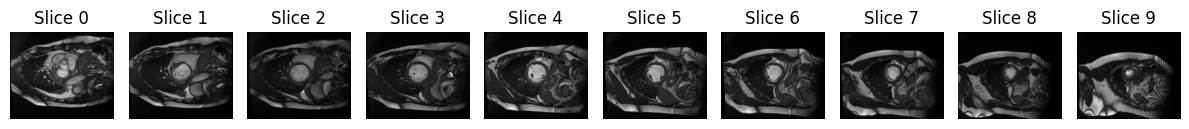

In [66]:
display_4d_nii_gz_file("/content/ACDC/database/training/patient001/patient001_4d.nii.gz")

(216, 256, 10)


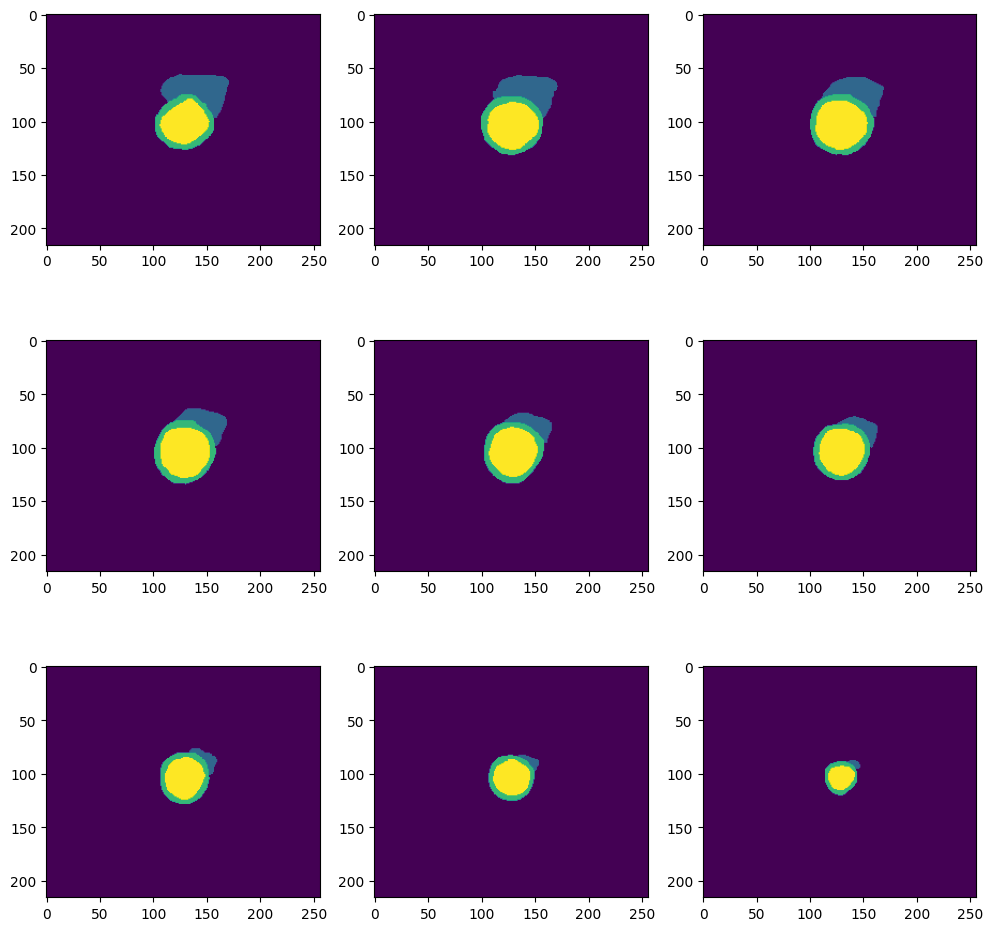

In [67]:
display_nii_gz_file("/content/ACDC/database/training/patient001/patient001_frame01_gt.nii.gz")

(216, 256, 10)


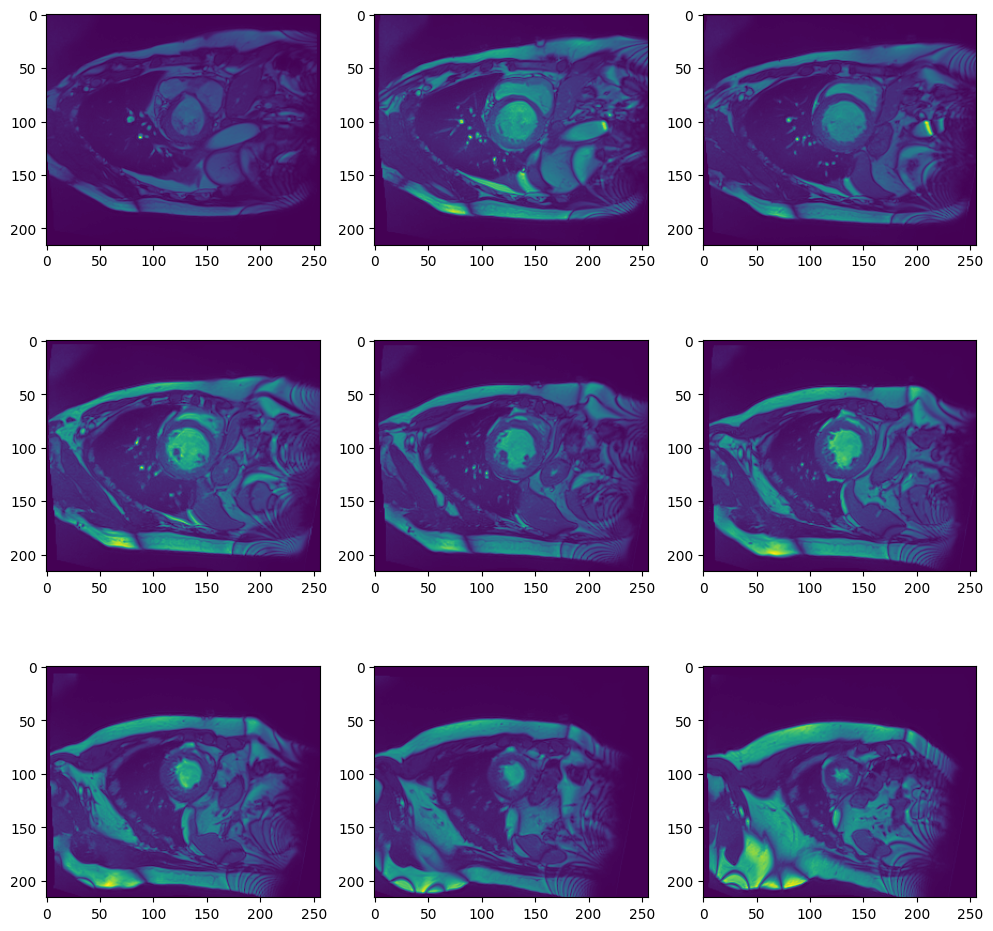

In [68]:
display_nii_gz_file("/content/ACDC/database/training/patient001/patient001_frame12.nii.gz")

(216, 256, 10)


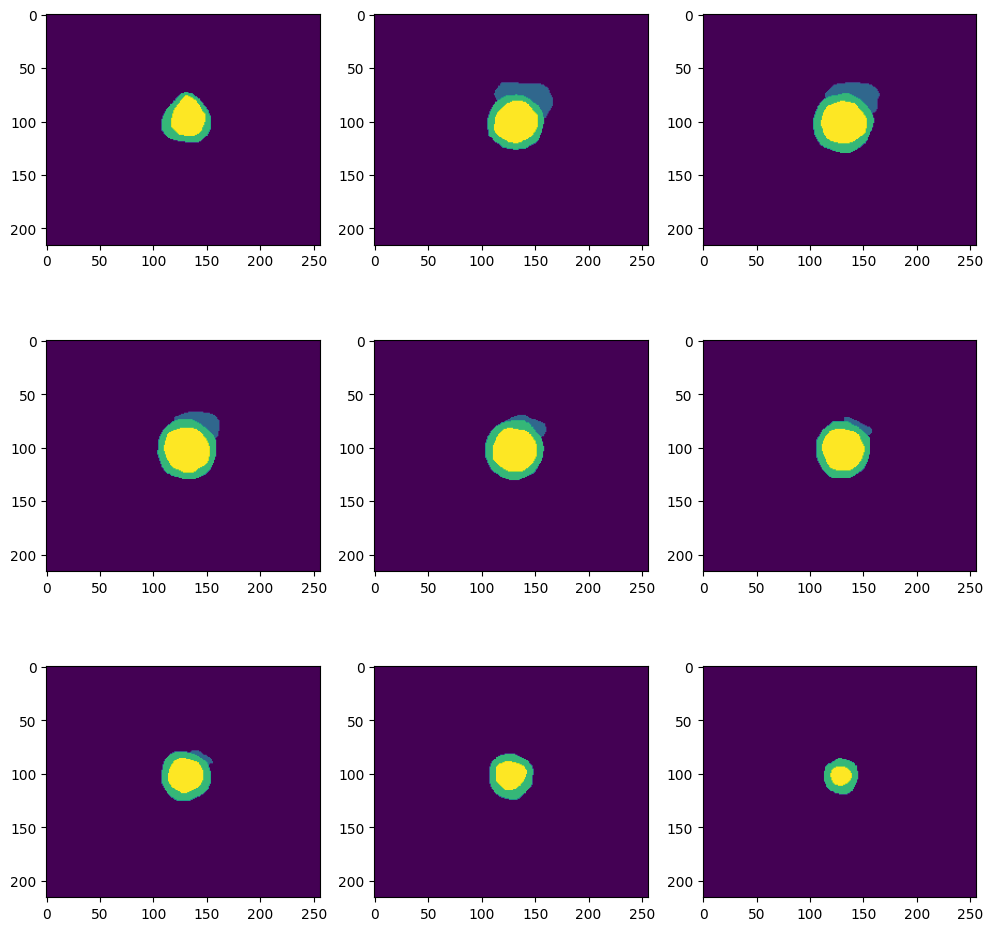

In [69]:
display_nii_gz_file("/content/ACDC/database/training/patient001/patient001_frame12_gt.nii.gz")

(216, 256, 10)


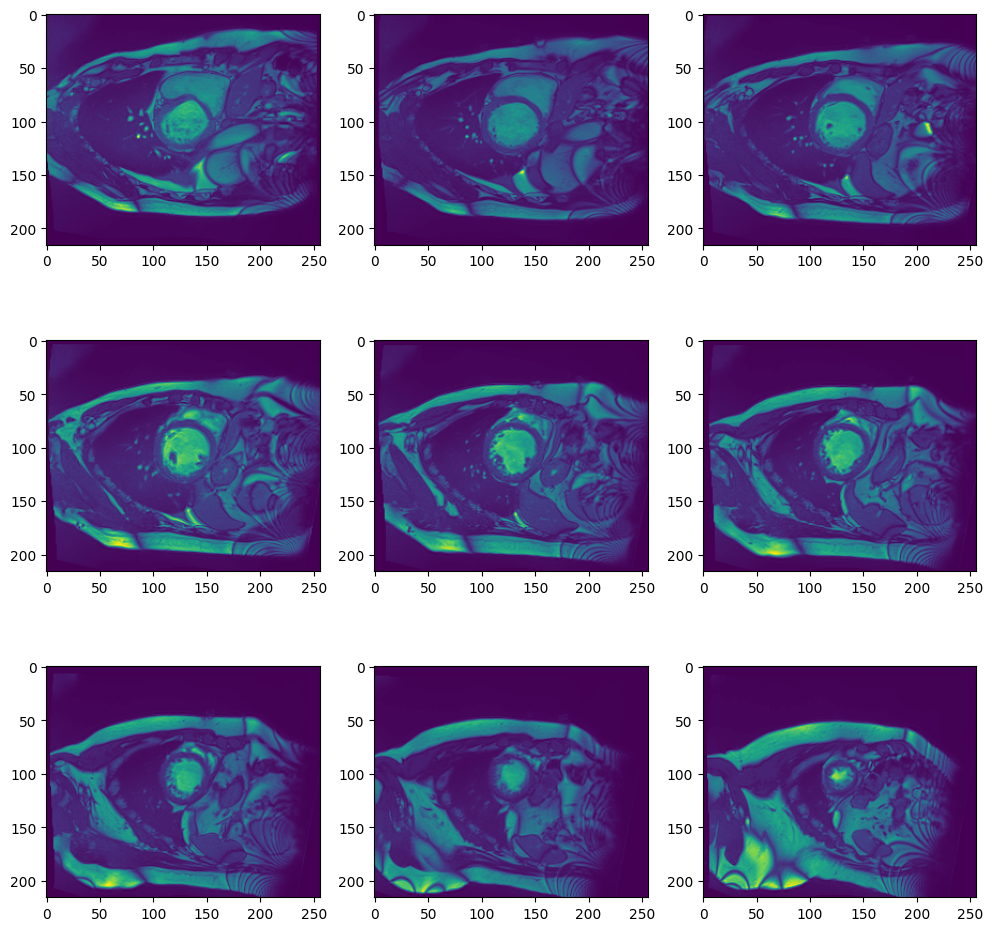

In [70]:
display_nii_gz_file("/content/ACDC/database/training/patient001/patient001_frame01.nii.gz")

(216, 256, 10)


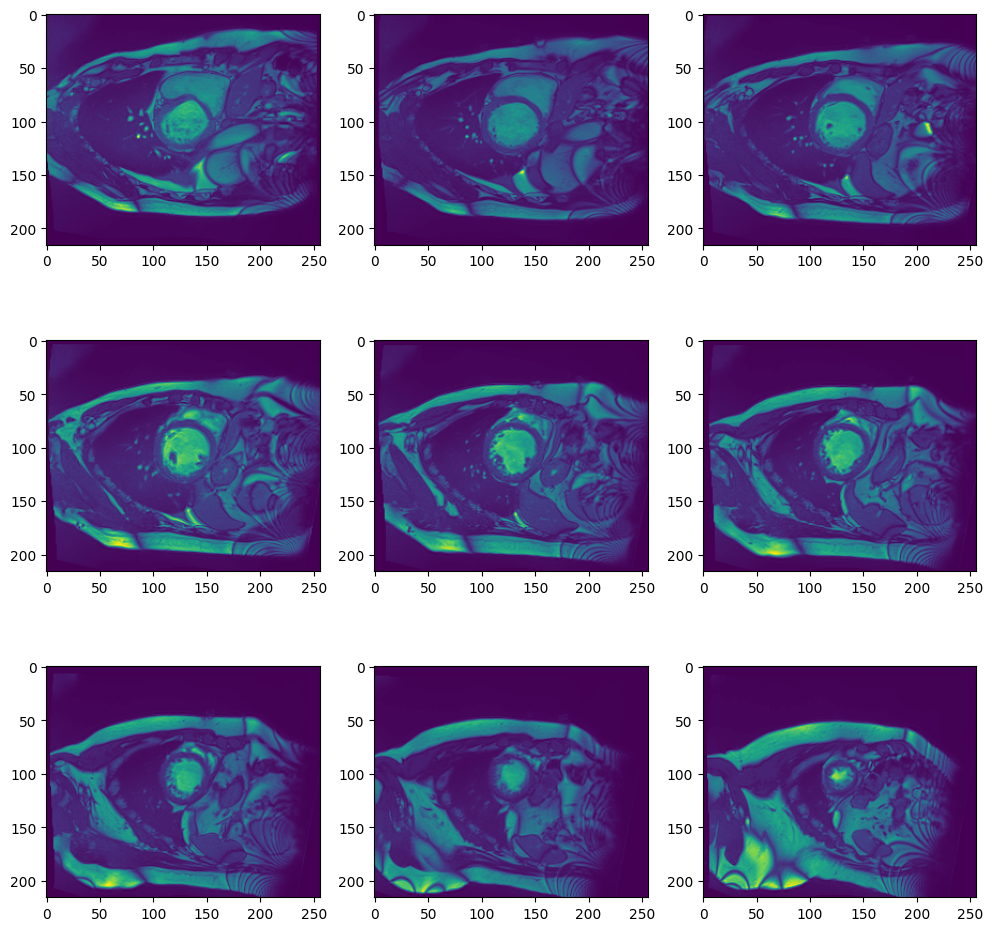

In [37]:
display_nii_gz_file("/content/ACDC/database/training/patient001/patient001_frame01.nii.gz")